# Naive Bayes for Titanic

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

trainset = pd.read_csv('../Data/Titanic_train.csv')
testset = pd.read_csv('../Data/Titanic_test.csv')

# 1. Data Exploration

In [2]:
trainset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
testset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


=> **Trainset: Age, Cabin and Embarked have null values.**

In [5]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


=> **Testset: Age, Fare and Cabin have null values.**

# 2. Data Visualization and Processing

In [6]:
dic = {}

## Survived

In [7]:
trainset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

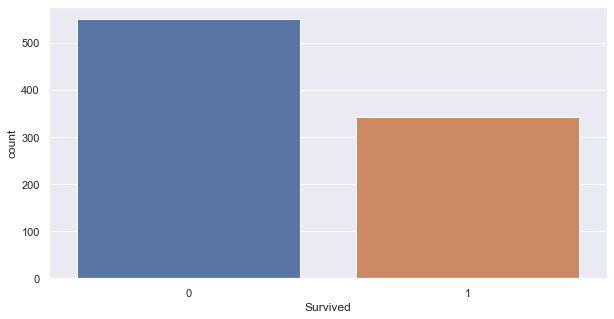

In [8]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))
sns.countplot(x='Survived', data=trainset)
plt.show()

## Pclass

In [9]:
trainset['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

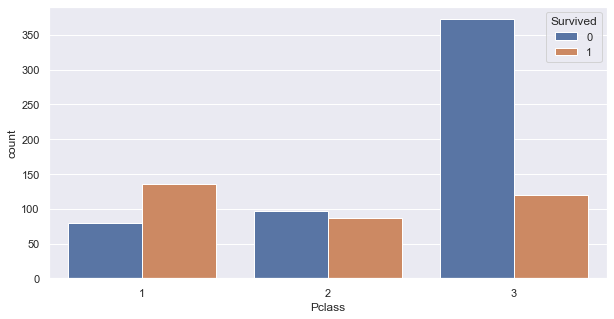

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='Pclass', data=trainset, hue='Survived')
plt.show()

In [11]:
testset['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

## Name

In [12]:
trainset['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

### **Name_Title**

In [13]:
trainset['Name_Title'] = trainset['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
trainset['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Name_Title, dtype: int64

In [14]:
trainset['Survived'].groupby(trainset['Name_Title']).value_counts()

Name_Title  Survived
Capt.       0             1
Col.        0             1
            1             1
Don.        0             1
Dr.         0             4
            1             3
Jonkheer.   0             1
Lady.       1             1
Major.      0             1
            1             1
Master.     1            23
            0            17
Miss.       1           127
            0            55
Mlle.       1             2
Mme.        1             1
Mr.         0           436
            1            81
Mrs.        1            99
            0            26
Ms.         1             1
Rev.        0             6
Sir.        1             1
the         1             1
Name: Survived, dtype: int64

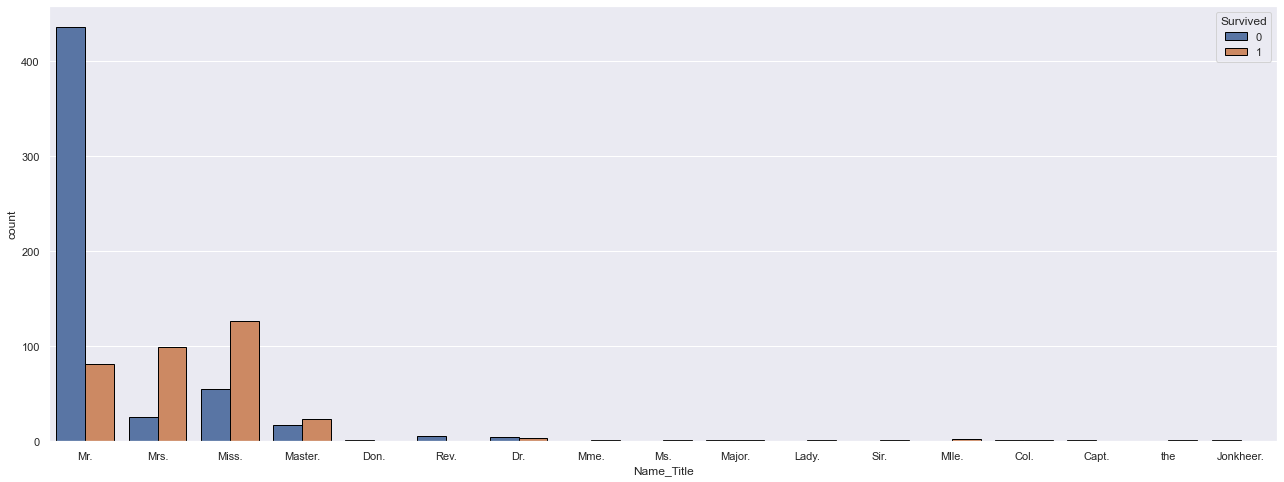

In [15]:
plt.figure(figsize=(22,8))
sns.countplot(x='Name_Title', data=trainset, hue='Survived', edgecolor='black')
plt.show()

In [16]:
def createDict(series):
  res = {}
  for idx, key in enumerate(series.unique()):
    res[key] = idx
  return res

In [17]:
Name_Title_dict = createDict(trainset['Name_Title'])
Name_Title_dict

{'Mr.': 0,
 'Mrs.': 1,
 'Miss.': 2,
 'Master.': 3,
 'Don.': 4,
 'Rev.': 5,
 'Dr.': 6,
 'Mme.': 7,
 'Ms.': 8,
 'Major.': 9,
 'Lady.': 10,
 'Sir.': 11,
 'Mlle.': 12,
 'Col.': 13,
 'Capt.': 14,
 'the': 15,
 'Jonkheer.': 16}

In [18]:
testset['Name'].head()

0                                Kelly, Mr. James
1                Wilkes, Mrs. James (Ellen Needs)
2                       Myles, Mr. Thomas Francis
3                                Wirz, Mr. Albert
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Name: Name, dtype: object

In [19]:
testset['Name_Title'] = testset['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
testset['Name_Title'].value_counts()

Mr.        240
Miss.       78
Mrs.        72
Master.     21
Col.         2
Rev.         2
Ms.          1
Dr.          1
Dona.        1
Name: Name_Title, dtype: int64

In [20]:
Name_Title_dict['Dona.'] = 17
dic['Name_Title_dict'] = Name_Title_dict

## Sex

In [21]:
trainset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

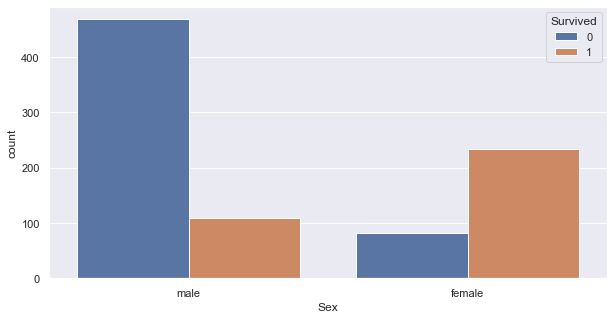

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex', data=trainset, hue='Survived')
plt.show()

In [23]:
Sex_dict = createDict(trainset['Sex'])
Sex_dict

{'male': 0, 'female': 1}

In [24]:
testset['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [25]:
dic['Sex_dict'] = Sex_dict

## Age

In [26]:
trainset['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [27]:
trainset['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [28]:
# Fill nan values
def gaussianFillNaN(series):
  mean = series.mean()
  std = series.std()
  return(series.apply(lambda x: abs(np.random.normal(mean, std)) if np.isnan(x) else x))

In [29]:
trainset['Age'] = gaussianFillNaN(trainset['Age'])
testset['Age'] = gaussianFillNaN(testset['Age'])

### **Age_Type**

In [30]:
trainset['Age_Type'] = trainset['Age'].apply(lambda x: 'child' if x < 13 else ('teen' if x < 20 else ('adult' if x < 35 else ('middle_age' if x < 65 else 'senior'))))
trainset['Age_Type'].value_counts()

adult         386
middle_age    281
teen          117
child          94
senior         13
Name: Age_Type, dtype: int64

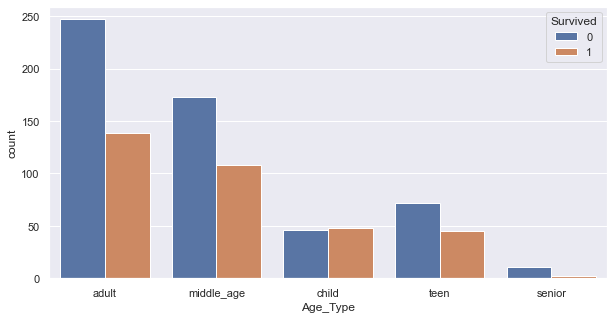

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age_Type', data=trainset, hue='Survived')
plt.show()

In [32]:
Age_Type_dict = createDict(trainset['Age_Type'])
Age_Type_dict

{'adult': 0, 'middle_age': 1, 'child': 2, 'teen': 3, 'senior': 4}

In [33]:
testset['Age_Type'] = testset['Age'].apply(lambda x: 'child' if x < 13 else ('teen' if x < 20 else ('adult' if x < 35 else ('middle_age' if x < 65 else 'senior'))))
testset['Age_Type'].value_counts()

adult         193
middle_age    139
teen           46
child          38
senior          2
Name: Age_Type, dtype: int64

In [34]:
dic['Age_Type_dict'] = Age_Type_dict

## SibSp

In [35]:
trainset['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [36]:
trainset['Survived'].groupby(trainset['SibSp']).value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

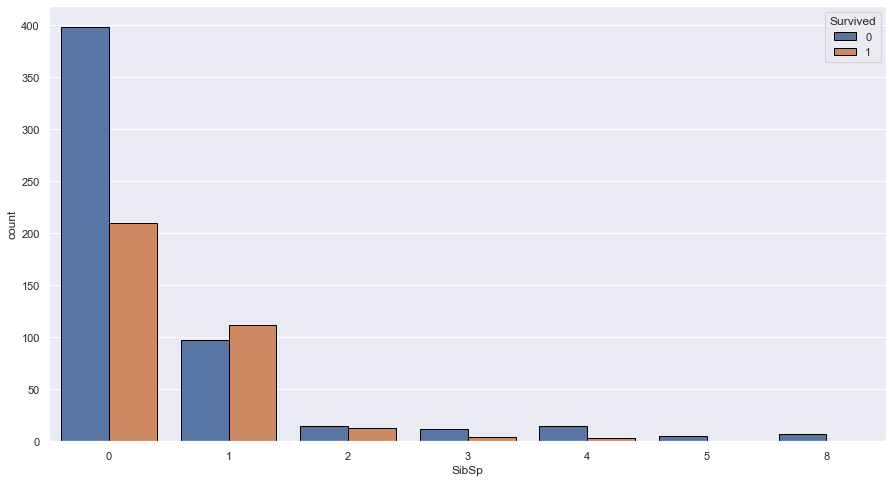

In [37]:
plt.figure(figsize=(15,8))
sns.countplot(x='SibSp', data=trainset, hue='Survived', edgecolor='black')
plt.legend(loc='upper right', title='Survived')
plt.show()

In [38]:
testset['SibSp'].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

## Parch

In [39]:
trainset['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [40]:
trainset['Survived'].groupby(trainset['Parch']).value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

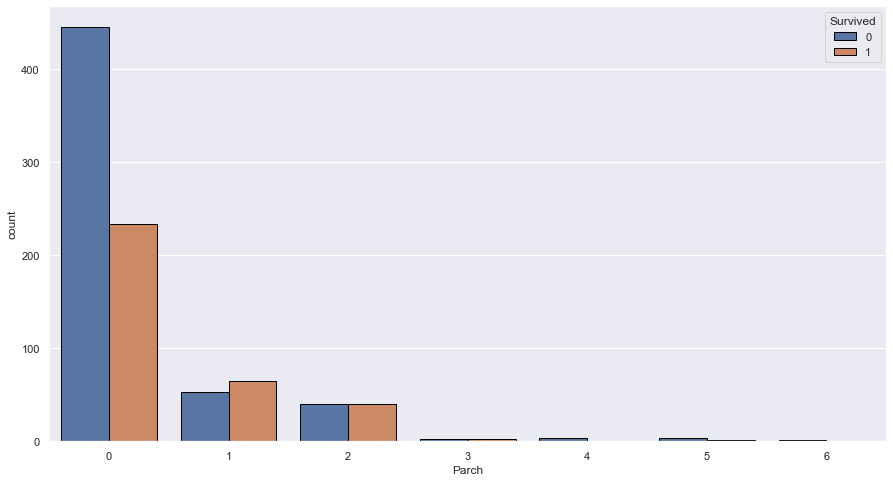

In [41]:
plt.figure(figsize=(15,8))
sns.countplot(x='Parch', data=trainset, hue='Survived', edgecolor='black')
plt.legend(loc='upper right', title='Survived')
plt.show()

In [42]:
testset['Parch'].value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

## Ticket

In [43]:
trainset['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [44]:
trainset['Survived'].groupby(trainset['Ticket']).value_counts()

Ticket       Survived
110152       1           3
110413       1           2
             0           1
110465       0           2
110564       1           1
                        ..
W./C. 6609   0           1
W.E.P. 5734  0           1
W/C 14208    0           1
WE/P 5735    0           1
             1           1
Name: Survived, Length: 730, dtype: int64

In [45]:
testset['Ticket'].value_counts()

PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64

### **Ticket_NumLen**

In [46]:
trainset['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [47]:
# Count len of numeric tickets - number-part's len of non-numeric tickets
trainset['Ticket_NumLen'] = trainset['Ticket'].apply(lambda x: str(len(x)) if x.isnumeric() else (str(len(x.split(' ')[-1])) + '-' if ((len(x.split(' ')) > 1)&(str(x.split(' ')[-1]).isnumeric())) else 0))
trainset['Ticket_NumLen'].value_counts()

6     415
5     131
5-    115
4      97
4-     68
7-     28
7      16
6-      8
3-      5
0       4
3       2
1-      2
Name: Ticket_NumLen, dtype: int64

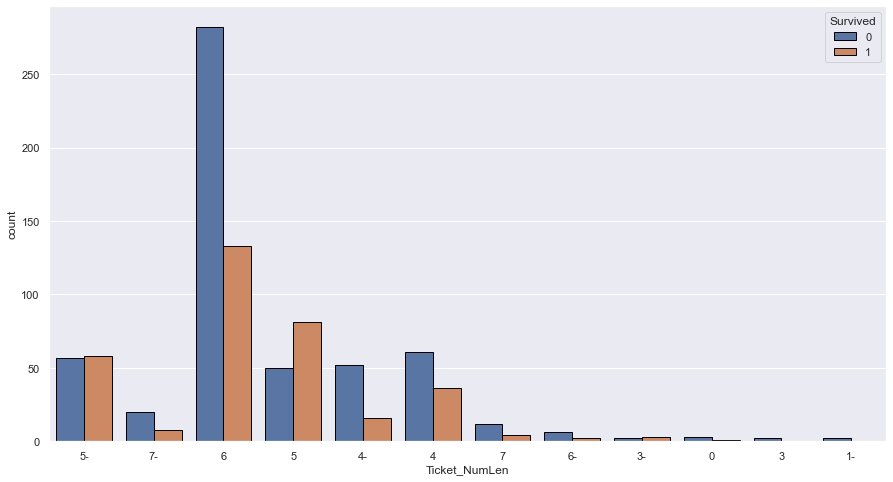

In [48]:
plt.figure(figsize=(15,8))
sns.countplot(x='Ticket_NumLen', data=trainset, hue='Survived', edgecolor='black')
plt.legend(loc='upper right', title='Survived')
plt.show()

In [49]:
Ticket_NumLen_dict = createDict(trainset['Ticket_NumLen'])
Ticket_NumLen_dict

{'5-': 0,
 '7-': 1,
 '6': 2,
 '5': 3,
 '4-': 4,
 '4': 5,
 '7': 6,
 '6-': 7,
 '3-': 8,
 0: 9,
 '3': 10,
 '1-': 11}

In [50]:
# Count len of numeric tickets - number-part's len of non-numeric tickets
testset['Ticket_NumLen'] = testset['Ticket'].apply(lambda x: str(len(x)) if x.isnumeric() else (str(len(x.split(' ')[-1])) + '-' if ((len(x.split(' ')) > 1)&(str(x.split(' ')[-1]).isnumeric())) else 0))
testset['Ticket_NumLen'].value_counts()

6     181
5-     69
5      62
4      47
4-     33
7-     12
7       4
3-      4
3       2
6-      2
1-      2
Name: Ticket_NumLen, dtype: int64

In [51]:
dic['Ticket_NumLen_dict'] = Ticket_NumLen_dict

### **Ticket_1stLett**

In [52]:
# First letter of tickets
trainset['Ticket_1stLett'] = trainset['Ticket'].apply(lambda x: x[0])
trainset['Ticket_1stLett'].value_counts()

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_1stLett, dtype: int64

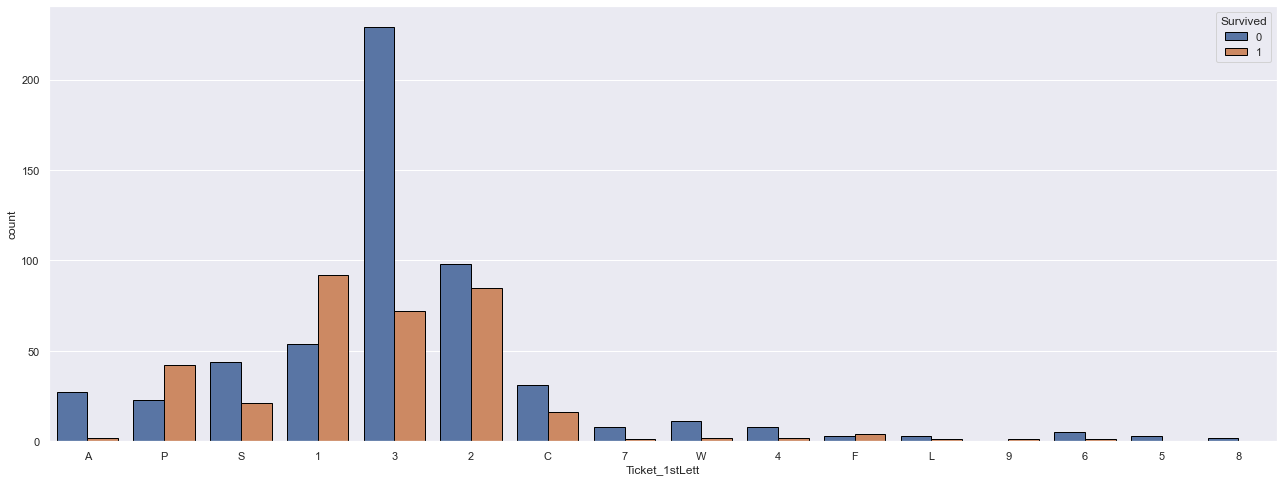

In [53]:
plt.figure(figsize=(22,8))
sns.countplot(x='Ticket_1stLett', data=trainset, hue='Survived', edgecolor='black')
plt.legend(loc='upper right', title='Survived')
plt.show()

In [54]:
Ticket_1stLett_dict = createDict(trainset['Ticket_1stLett'])
Ticket_1stLett_dict

{'A': 0,
 'P': 1,
 'S': 2,
 '1': 3,
 '3': 4,
 '2': 5,
 'C': 6,
 '7': 7,
 'W': 8,
 '4': 9,
 'F': 10,
 'L': 11,
 '9': 12,
 '6': 13,
 '5': 14,
 '8': 15}

In [55]:
# First letter of tickets
testset['Ticket_1stLett'] = testset['Ticket'].apply(lambda x: x[0])
testset['Ticket_1stLett'].value_counts()

3    128
2     95
1     64
S     33
P     33
C     30
A     13
W      6
F      6
7      4
6      3
4      1
9      1
L      1
Name: Ticket_1stLett, dtype: int64

In [56]:
dic['Ticket_1stLett_dict'] = Ticket_1stLett_dict

## Fare

In [57]:
trainset['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [58]:
trainset['Survived'].groupby(trainset['Fare']).value_counts()

Fare      Survived
0.0000    0           14
          1            1
4.0125    0            1
5.0000    0            1
6.2375    0            1
                      ..
247.5208  1            1
262.3750  1            2
263.0000  0            2
          1            2
512.3292  1            3
Name: Survived, Length: 330, dtype: int64

C:\Users\ulqui\AppData\Local\Temp/ipykernel_12768/2096798241.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax1.hist(trainset[trainset['Survived'] == 0][trainset['Fare'] <= 100]['Fare'], bins=100, label='0')
C:\Users\ulqui\AppData\Local\Temp/ipykernel_12768/2096798241.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax2.hist(trainset[trainset['Survived'] == 1][trainset['Fare'] <= 100]['Fare'], bins=100, color='peru', label='1')


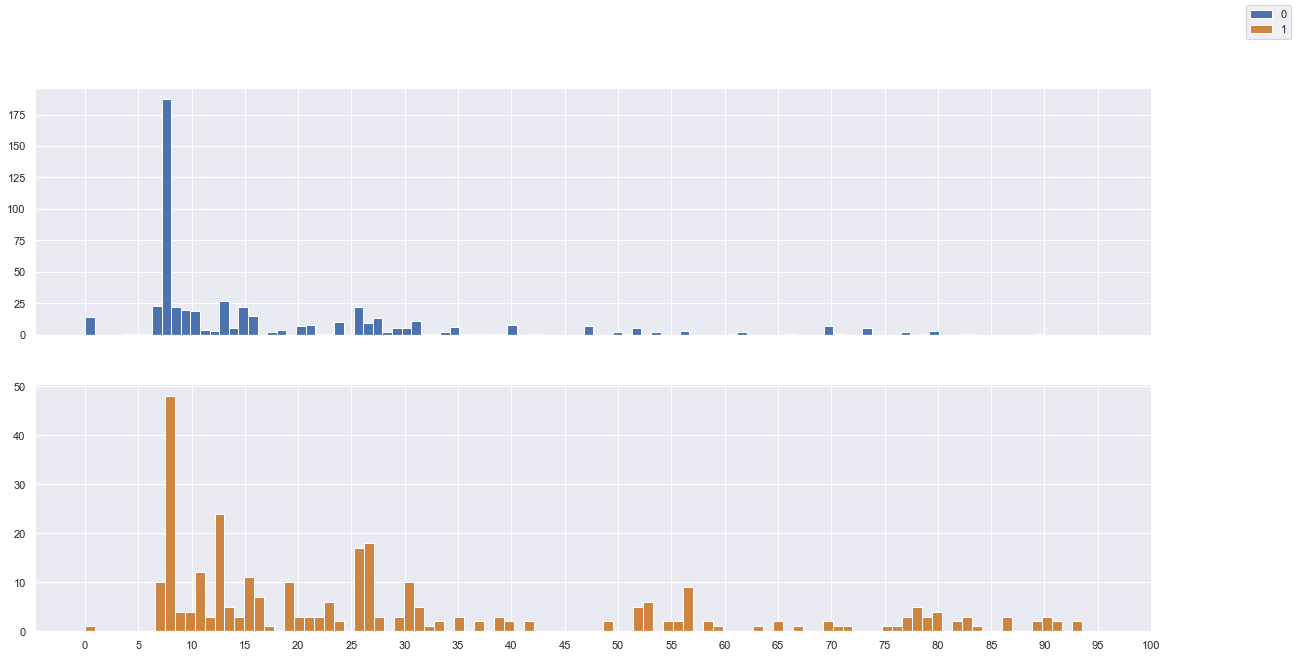

In [59]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

ax1.hist(trainset[trainset['Survived'] == 0][trainset['Fare'] <= 100]['Fare'], bins=100, label='0')
ax2.hist(trainset[trainset['Survived'] == 1][trainset['Fare'] <= 100]['Fare'], bins=100, color='peru', label='1')

ax1.label_outer()
ax2.label_outer()

ax1.set_xticks(np.arange(0, 105, 5))
ax2.set_xticks(np.arange(0, 105, 5))

fig.legend()

C:\Users\ulqui\AppData\Local\Temp/ipykernel_12768/699248297.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax1.hist(trainset[trainset['Survived'] == 0][trainset['Fare'] > 100]['Fare'], bins=100, label='0')
C:\Users\ulqui\AppData\Local\Temp/ipykernel_12768/699248297.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax2.hist(trainset[trainset['Survived'] == 1][trainset['Fare'] > 100]['Fare'], bins=100, color='peru', label='1')


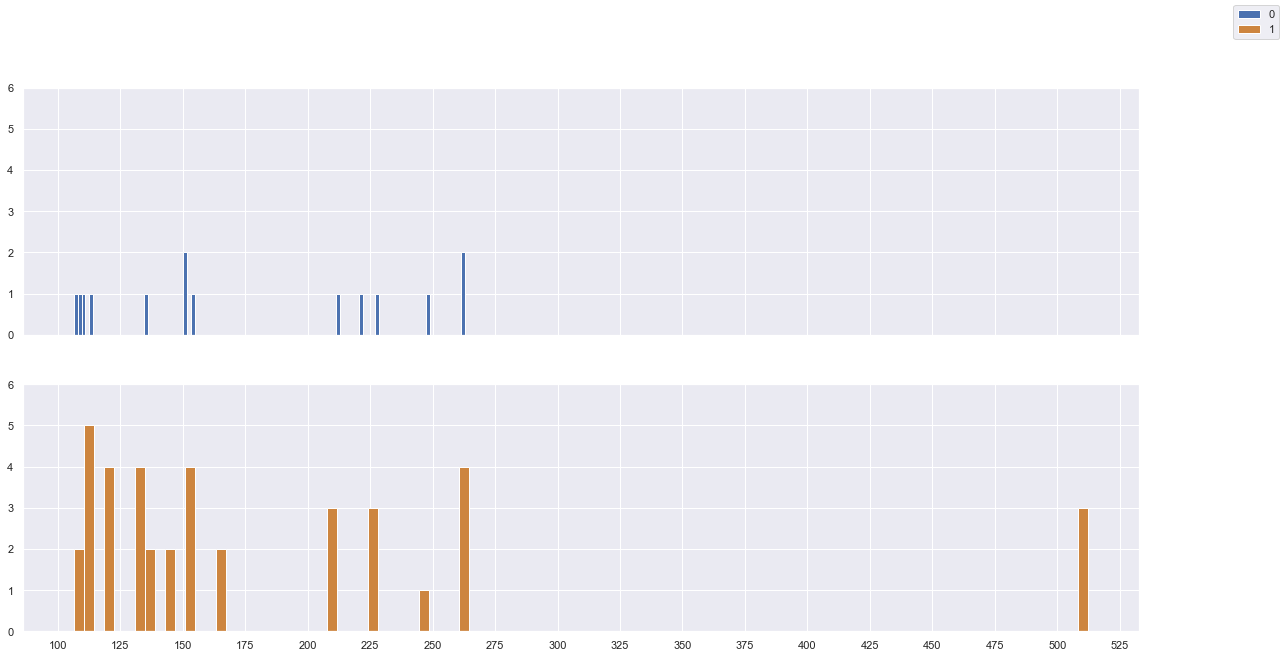

In [60]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

ax1.hist(trainset[trainset['Survived'] == 0][trainset['Fare'] > 100]['Fare'], bins=100, label='0')
ax2.hist(trainset[trainset['Survived'] == 1][trainset['Fare'] > 100]['Fare'], bins=100, color='peru', label='1')

ax1.label_outer()
ax2.label_outer()

ax1.set_xticks(np.arange(100, 550, 25))
ax1.set_yticks(np.arange(0, 7, 1))
ax2.set_xticks(np.arange(100, 550, 25))
ax2.set_yticks(np.arange(0, 7, 1))

fig.legend()

### **Fare_Range**

In [61]:
trainset['Fare_Range'] = trainset['Fare'].apply(lambda x: 'd' if x == 0 else ('c' if x < 36 else ('b' if x < 101 else ('a' if x < 301 else 's'))))
trainset['Fare_Range'].value_counts()

c    682
b    141
a     50
d     15
s      3
Name: Fare_Range, dtype: int64

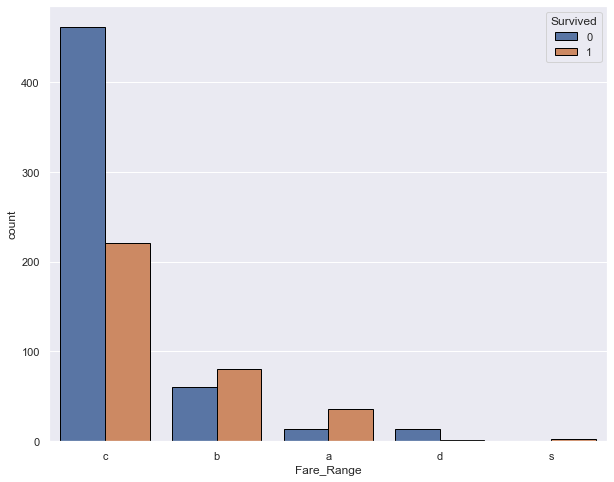

In [62]:
plt.figure(figsize=(10,8))
sns.countplot(x='Fare_Range', data=trainset, hue='Survived', edgecolor='black')
plt.legend(loc='upper right', title='Survived')
plt.show()

In [63]:
Fare_Range_dict = createDict(trainset['Fare_Range'])
Fare_Range_dict

{'c': 0, 'b': 1, 'a': 2, 'd': 3, 's': 4}

In [64]:
testset['Fare'] = gaussianFillNaN(testset['Fare'])

In [65]:
testset['Fare_Range'] = testset['Fare'].apply(lambda x: 'd' if x == 0 else ('c' if x < 36 else ('b' if x < 101 else ('a' if x < 301 else 's'))))
testset['Fare_Range'].value_counts()

c    318
b     67
a     30
d      2
s      1
Name: Fare_Range, dtype: int64

In [66]:
dic['Fare_Range_dict'] = Fare_Range_dict

## Cabin

In [67]:
trainset['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [68]:
trainset['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [69]:
# Random with custom distribution
def randFillNaN(series):
  vlist = series[series != '-1'].value_counts()
  ele = vlist.keys()
  dist = vlist.values / sum(vlist.values)
  return(series.apply(lambda x: np.random.choice(ele, p=dist) if x == '-1' else x))

### **Cabin_Type**

In [70]:
trainset['Cabin_Type'] = trainset['Cabin'].apply(lambda x: x[0] if x is not np.NaN else '-1')
trainset['Cabin_Type'].value_counts()

-1    687
C      59
B      47
D      33
E      32
A      15
F      13
G       4
T       1
Name: Cabin_Type, dtype: int64

In [71]:
trainset['Cabin_Type'] = randFillNaN(trainset['Cabin_Type'])
trainset['Cabin_Type'].value_counts()

C    268
B    188
E    147
D    141
A     65
F     61
G     15
T      6
Name: Cabin_Type, dtype: int64

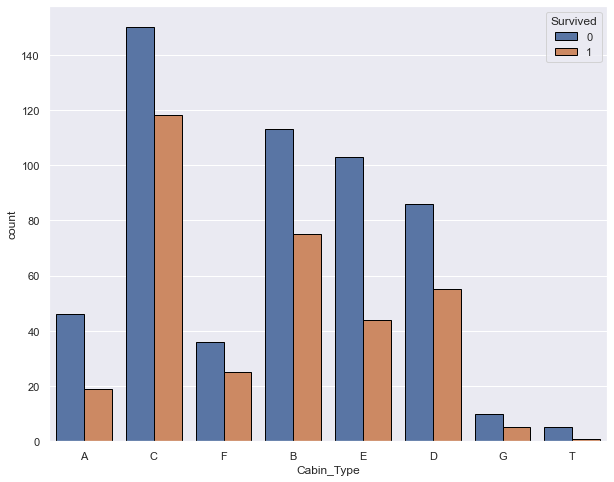

In [72]:
plt.figure(figsize=(10,8))
sns.countplot(x='Cabin_Type', data=trainset, hue='Survived', edgecolor='black')
plt.legend(loc='upper right', title='Survived')
plt.show()

In [73]:
Cabin_Type_dict = createDict(trainset['Cabin_Type'])
Cabin_Type_dict

{'A': 0, 'C': 1, 'F': 2, 'B': 3, 'E': 4, 'D': 5, 'G': 6, 'T': 7}

In [74]:
testset['Cabin_Type'] = testset['Cabin'].apply(lambda x: x[0] if x is not np.NaN else '-1')
testset['Cabin_Type'].value_counts()

-1    327
C      35
B      18
D      13
E       9
F       8
A       7
G       1
Name: Cabin_Type, dtype: int64

In [75]:
testset['Cabin_Type'] = randFillNaN(testset['Cabin_Type'])
testset['Cabin_Type'].value_counts()

C    156
B     83
D     65
F     46
E     38
A     28
G      2
Name: Cabin_Type, dtype: int64

In [76]:
dic['Cabin_Type_dict'] = Cabin_Type_dict

## Embarked

In [77]:
trainset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [78]:
trainset['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### **Embarked_Type**

In [79]:
trainset['Embarked_Type'] = trainset['Embarked'].apply(lambda x: x if x is not np.NaN else '-1')
trainset['Embarked_Type'].value_counts()

S     644
C     168
Q      77
-1      2
Name: Embarked_Type, dtype: int64

In [80]:
trainset['Embarked_Type'] = randFillNaN(trainset['Embarked_Type'])
trainset['Embarked_Type'].value_counts()

S    644
C    169
Q     78
Name: Embarked_Type, dtype: int64

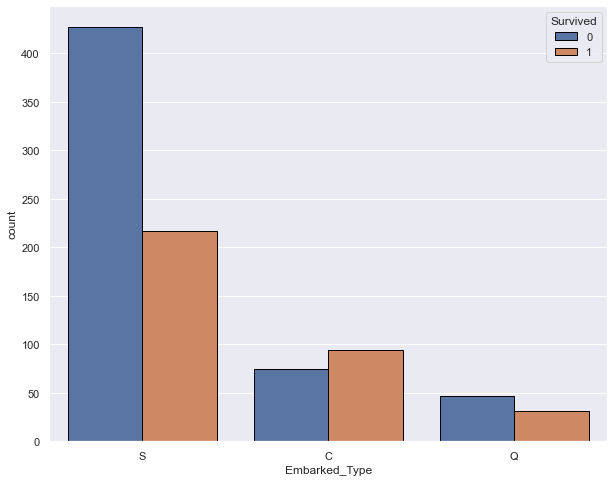

In [81]:
plt.figure(figsize=(10,8))
sns.countplot(x='Embarked_Type', data=trainset, hue='Survived', edgecolor='black')
plt.legend(loc='upper right', title='Survived')
plt.show()

In [82]:
Embarked_Type_dict = createDict(trainset['Embarked_Type'])
Embarked_Type_dict

{'S': 0, 'C': 1, 'Q': 2}

In [83]:
testset['Embarked_Type'] = testset['Embarked'].apply(lambda x: x if x is not np.NaN else '-1')
testset['Embarked_Type'].value_counts()

S    270
C    102
Q     46
Name: Embarked_Type, dtype: int64

In [84]:
dic['Embarked_Type_dict'] = Embarked_Type_dict

## General Processing

In [85]:
trainset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Age_Type,Ticket_NumLen,Ticket_1stLett,Fare_Range,Cabin_Type,Embarked_Type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,adult,5-,A,c,A,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,middle_age,5-,P,b,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,adult,7-,S,c,C,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,middle_age,6,1,b,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,middle_age,6,3,c,F,S


In [86]:
testset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,Age_Type,Ticket_NumLen,Ticket_1stLett,Fare_Range,Cabin_Type,Embarked_Type
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.,adult,6,3,c,C,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.,middle_age,6,3,c,A,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr.,middle_age,6,2,c,D,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr.,adult,6,3,c,E,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs.,adult,7,3,c,C,S


In [87]:
# drop_elements = ['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Parch', 'SibSp']
# drop random elements for more accuracy
drop_elements = ['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare_Range', 'Cabin_Type', 'Age_Type']
trainset = trainset.drop(drop_elements, axis=1)
testset = testset.drop(drop_elements, axis=1)

In [88]:
trainset.head()

,Survived,Pclass,Sex,SibSp,Parch,Name_Title,Ticket_NumLen,Ticket_1stLett,Embarked_Type
0,0,3,male,1,0,Mr.,5-,A,S
1,1,1,female,1,0,Mrs.,5-,P,C
2,1,3,female,0,0,Miss.,7-,S,S
3,1,1,female,1,0,Mrs.,6,1,S
4,0,3,male,0,0,Mr.,6,3,S


In [89]:
testset.head()

,Pclass,Sex,SibSp,Parch,Name_Title,Ticket_NumLen,Ticket_1stLett,Embarked_Type
0,3,male,0,0,Mr.,6,3,Q
1,3,female,1,0,Mrs.,6,3,S
2,2,male,0,0,Mr.,6,2,Q
3,3,male,0,0,Mr.,6,3,S
4,3,female,1,1,Mrs.,7,3,S


In [90]:
# Map new values
def mapVal(dataset, col, dic):
  dataset[col] = dataset[col].apply(lambda x: dic[x])
  return dataset

In [91]:
# map_elements = ['Sex', 'Name_Title', 'Age_Type', 'Ticket_NumLen', 'Ticket_1stLett', 'Fare_Range', 'Cabin_Type', 'Embarked_Type']
map_elements = ['Sex', 'Name_Title', 'Ticket_NumLen', 'Ticket_1stLett', 'Embarked_Type']
for ele in map_elements:
  trainset = mapVal(trainset, ele, dic[ele + '_dict'])
  testset = mapVal(testset, ele, dic[ele + '_dict'])

In [92]:
trainset.head()

,Survived,Pclass,Sex,SibSp,Parch,Name_Title,Ticket_NumLen,Ticket_1stLett,Embarked_Type
0,0,3,0,1,0,0,0,0,0
1,1,1,1,1,0,1,0,1,1
2,1,3,1,0,0,2,1,2,0
3,1,1,1,1,0,1,2,3,0
4,0,3,0,0,0,0,2,4,0


In [93]:
testset.head()

,Pclass,Sex,SibSp,Parch,Name_Title,Ticket_NumLen,Ticket_1stLett,Embarked_Type
0,3,0,0,0,0,2,4,2
1,3,1,1,0,1,2,4,0
2,2,0,0,0,0,2,5,2
3,3,0,0,0,0,2,4,0
4,3,1,1,1,1,6,4,0


In [94]:
from sklearn import model_selection

X = trainset.drop('Survived', axis=1)
y = trainset['Survived']
X_pred = testset

# Split train/test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(712, 8) (179, 8)


# 3. MultinomialNB

## Choosing MultinomialNB for Titanic classifier because we are using discrete data.

In [95]:
from sklearn import naive_bayes, metrics

# Choose alpha
list_alpha = np.arange(10**-6, 20, 0.01)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

In [96]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=5)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.000001,0.787921,0.804469,0.7,0.777778
1,0.010001,0.787921,0.804469,0.7,0.777778
2,0.020001,0.787921,0.804469,0.7,0.777778
3,0.030001,0.787921,0.804469,0.7,0.777778
4,0.040001,0.787921,0.804469,0.7,0.777778


In [97]:
best_index = models['Test Precision'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]

alpha             18.660001
Train Accuracy     0.787921
Test Accuracy      0.804469
Test Recall        0.671429
Test Precision     0.796610
Name: 1866, dtype: float64

In [98]:
confusion_matrix = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = confusion_matrix, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,97,12
Actual 1,23,47


## Model on predict set

In [99]:
bayes.predict(X_pred)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,